**<h1 text align = center>1. Quora Question pair Similarity Case Study </h1>**

*1* Linking colab with Gdrive.

*2* Importing Bunch of libraries.

*3* Gethering data information.

In [10]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")
import re
from nltk.stem import PorterStemmer
from wordcloud import WordCloud , STOPWORDS 
import nltk
nltk.download("stopwords")
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
! pip install distance
import distance
! pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from os import path
! pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
! pip install spacy
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from tqdm import tqdm
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.metrics import accuracy_score , log_loss
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=a10286b3f770445d4a2024ad1224bc9b23f6e6d3a808db501084c1c092c79512
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2>1.1 Reading the data and analysing it.

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Quora/train.csv")
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [ ]:
df.describe

<bound method NDFrame.describe of             id    qid1    qid2  \
0            0       1       2   
1            1       3       4   
2            2       5       6   
3            3       7       8   
4            4       9      10   
...        ...     ...     ...   
404285  404285  433578  379845   
404286  404286   18840  155606   
404287  404287  537928  537929   
404288  404288  537930  537931   
404289  404289  537932  537933   

                                                question1  \
0       What is the step by step guide to invest in sh...   
1       What is the story of Kohinoor (Koh-i-Noor) Dia...   
2       How can I increase the speed of my internet co...   
3       Why am I mentally very lonely? How can I solve...   
4       Which one dissolve in water quikly sugar, salt...   
...                                                   ...   
404285  How many keywords are there in the Racket prog...   
404286          Do you believe there is life after death?   
404287  

In [ ]:
df.describe()

id           qid1           qid2   is_duplicate
count  404290.000000  404290.000000  404290.000000  404290.000000
mean   202144.500000  217243.942418  220955.655337       0.369198
std    116708.614503  157751.700002  159903.182629       0.482588
min         0.000000       1.000000       2.000000       0.000000
25%    101072.250000   74437.500000   74727.000000       0.000000
50%    202144.500000  192182.000000  197052.000000       0.000000
75%    303216.750000  346573.500000  354692.500000       1.000000
max    404289.000000  537932.000000  537933.000000       1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate'], dtype='object')

<h2>1.2 Plotting the duplicate(1) and non duplicate(0) questions id.

<Axes: xlabel='is_duplicate'>

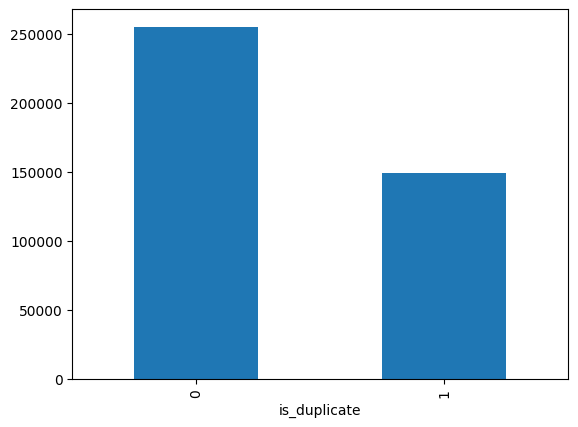

In [ ]:
df.groupby("is_duplicate")["id"].count().plot.bar()

In [ ]:
print(" {}% of data points is non-duplicate (not Similar).".format(100 - round(df['is_duplicate'].mean() *100,2)))

 63.08% of data points is non-duplicate (not Similar).


In [ ]:
print("{}% of data points is duplicate (Similar)." .format(round(df["is_duplicate"].mean() *100 , 2)))

36.92% of data points is duplicate (Similar).


In [ ]:
# the code aims to analyze the values in the 'qid1' and 'qid2' columns of the DataFrame and provide insights about the uniqueness
# and frequency of the values present in these columns.
qids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
unq_qstn = len(np.unique(qids))
qstn_more_than_one = np.sum(qids.value_counts() > 1)
print(qids.value_counts())

2559      157
30782     120
4044      111
2561       88
14376      79
         ... 
416446      1
416444      1
416441      1
416439      1
537933      1
Length: 537933, dtype: int64


In [ ]:
print("Number of unique question that appear more than once are {} {}%".format(qstn_more_than_one , qstn_more_than_one/unq_qstn*100))

Number of unique question that appear more than once are 111780 20.77953945937505%


In [ ]:
np.where(qids==2559)
# Question id 2559 that repeated max 157 times.

(array([ 14712,  38200,  56239,  81363,  81973,  82016,  86631,  89295,
        106632, 113625, 115228, 115816, 132320, 134629, 140355, 161485,
        202883, 213954, 216562, 228052, 228265, 253672, 263505, 268883,
        273689, 277652, 288565, 306135, 326227, 327551, 339152, 345086,
        346570, 360010, 377925, 379679, 381257, 387610, 390048, 390396,
        390423, 402909, 405573, 406580, 413055, 413291, 416537, 423174,
        424601, 430411, 437518, 441079, 443432, 454554, 460749, 461301,
        464299, 464481, 477254, 481244, 483415, 485065, 489063, 489338,
        495118, 500642, 508987, 511594, 512300, 523253, 524870, 529593,
        531767, 535880, 541727, 542669, 549361, 551582, 553411, 554847,
        555661, 558792, 569210, 572732, 574029, 574958, 576006, 576139,
        582954, 583724, 595202, 595902, 598104, 600816, 604358, 618444,
        618709, 619190, 623634, 623878, 634487, 636050, 638455, 640661,
        641556, 643098, 643585, 643874, 644415, 644517, 647931, 

In [ ]:
print(df.loc[38200])

id                                                  38200
qid1                                                 2559
qid2                                                 2711
question1          What are the best ways to lose weight?
question2       What is the best method of losing weight?
is_duplicate                                            1
Name: 38200, dtype: object


Question with **qid1= *2559*** repeated max **157** times and the question is " **What are the best way to lose weight?** "

<h2>1.3 Plotting Unique and Repeated Questions

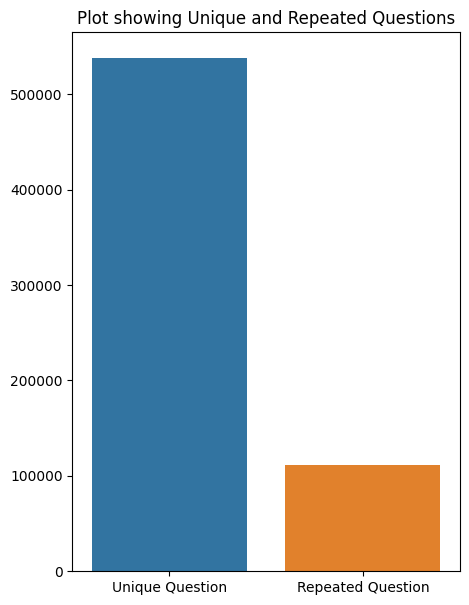

In [ ]:
x = ['Unique Question' , 'Repeated Question']
y = [unq_qstn , qstn_more_than_one]
plt.figure(figsize=(5,7))
sns.barplot(x= x,y=y)
plt.title("Plot showing Unique and Repeated Questions")
plt.show()

*--> Checking the duplicate Pair of Questions*

In [ ]:
pair_duplicates = df[["qid1","qid2","is_duplicate"]].groupby(["qid1" ,"qid2" ]).count().reset_index()
print("Number of Duplicate Questions",(pair_duplicates).shape[0] - df.shape[0])

Number of Duplicate Questions 0


<h2>1.4 Plotting number of occurance of questions

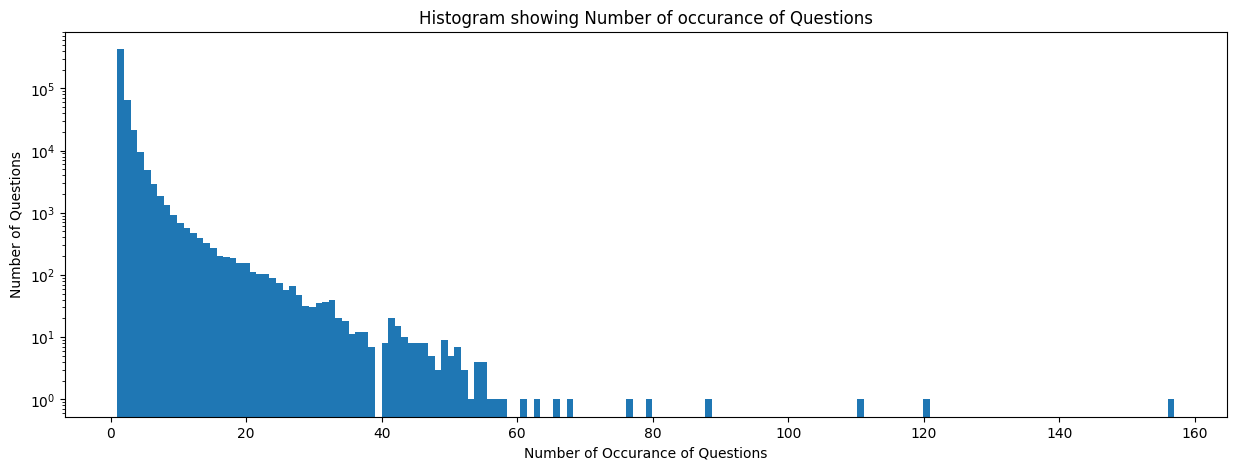

Maximum number of time a single question occure is 157


In [ ]:
plt.figure(figsize=(15,5))
plt.hist(qids.value_counts() , bins=160)
plt.yscale('log')
plt.xlabel("Number of Occurance of Questions")
plt.ylabel("Number of Questions")
plt.title("Histogram showing Number of occurance of Questions")
plt.show()
print("Maximum number of time a single question occure is {}".format(max(qids.value_counts())))

*--> Checking the Null Values*

In [ ]:
narow = df[df.isnull().any(1)]
narow

id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0

OBSERVATION: Column question2 has **Two** null value and column question1 has **One** null value.

In [ ]:
# removing the null values.
df = df.fillna('')
na_row = df[df.isnull().any(1)]
print(na_row)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


<h2>1.5 Lets try some basic **Feature Extraction** before cleaning the data

- ____freq_qid1____
- ____freq_qid2____
- ____q1_len____
- ____q2_len____
- ____q1_n_words____
- ____q2_n_words____
- ____word_common____
- ____word_total____
- ____word_share____
- ____freq_qid1 + freq_qid2____
- ____freq_qid1 - freq_qid2____

<h3> 1.5.1 The below code snippet is essentially extracting various features from the 'df' DataFrame and saving the modified DataFrame to the CSV file for further analysis or usage.

In [ ]:
if os.path.isfile("/content/gdrive/My Drive/Quora/basic_feature_extraction.csv"): # if file.csv in my gdrive then open else create new file.csv
  df = pd.read_csv("/content/gdrive/My Drive/Quora/basic_feature_extraction.csv" , encoding="latin-1")
else:
  df["freq_qid1"] = df.groupby('qid1')['qid1'].transform('count') # checking repeating frequency of question1
  df["freq_qid2"] = df.groupby('qid2')['qid2'].transform('count') # ---do----
  df["q1_len"]    = df['question1'].str.len()   # creating length of string eg:- shubham balgotra ----o/p= 16(including space as character)
  df["q2_len"]    = df['question2'].str.len()   #----do---
  df["q1_n_words"]= df['question1'].apply(lambda row: len(row.split(" ")))   # apply() use to apply function, lambda keyword is used to define an anonymous function in Python. 
  df["q2_n_words"]= df['question2'].apply(lambda row: len(row.split(" ")))   #----do----
  
  def normalized_word_common(row):
    w1 = set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))   # set() arrange in ascending order, map() allows you to process and transform all the items in an iterable without using an explicit for loop
    w2 = set(map(lambda word: word.lower().strip() , row['question2'].split(" ")))   #strip() remove whitespaces.
    return 1.0 * len(w1 & w2)   # question words split with space, perform lower() and strip() function on it and store to w1 and w2 respect. and then using AND on w1 and w2.     
  df["word_common"] = df.apply(normalized_word_common , axis=1)

  def normalized_word_total(row):
    w1 = set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip() , row['question2'].split(" ")))
    return 1.0 * (len(w1) + len(w2)) # question words split with space, perform lower() and strip() function on it and store to w1 and w2 respect. and then using OR on w1 and w2.
  df["word_total"] = df.apply(normalized_word_total , axis=1)

  def normalized_word_share(row):
    w1 = set(map(lambda word: word.lower().strip() , row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip() , row['question2'].split(" ")))
    return 1.0 * len(w1 & w2)/(len(w1)+len(w2)) # question words split with space, perform lower() and strip() function on it and store to w1 and w2 respect. and then using AND/OR on w1 and w2.
  df["word_share"] = df.apply(normalized_word_share , axis=1)

  df["freq_qid1+qid2"] = df["freq_qid1"] + df["freq_qid2"]   # Adding occurance of both questions 
  df["freq_qid1-qid2"] = abs(df["freq_qid1"] - df["freq_qid2"]) # Subtracting occurance of questions

  df.to_csv("/content/gdrive/My Drive/Quora/basic_feature_extraction.csv", index=False)

df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   

   freq_qid2  q1_len  q2_len  q1_n_words  q2_n_words  word_common  word_total  \
0          1      66      57          14          12         10.0        23.0   
1          1      51      88           8          13          4.0        20.0   

   word_share  freq_qid1+qid2  freq_qid1-qid2  
0    0.434783               2               0  
1    0.200000               5               3

In [ ]:
df.shape

(404290, 17)

In [ ]:
print("Minimum length of words in question1 {}".format(min(df['q1_n_words'])))
print("Minimum length of words in question2 {}\n".format(min(df['q2_n_words'])))

print("Maximum length of words in question1 {}".format(max(df['q1_n_words'])))
print("Maximum length of words in question2 {}\n".format(max(df['q2_n_words'])))
print("Number of questions in question1 containing ONE word only = {}".format(len(df[df['q1_n_words']==1])))
print("Number of questions in question2 containing ONE word only = {}".format(len(df[df['q2_n_words']==1])))

Minimum length of words in question1 1
Minimum length of words in question2 1

Maximum length of words in question1 125
Maximum length of words in question2 237

Number of questions in question1 containing ONE word only = 67
Number of questions in question2 containing ONE word only = 24


<h3> 1.5.2 Analysing feature Word_share.

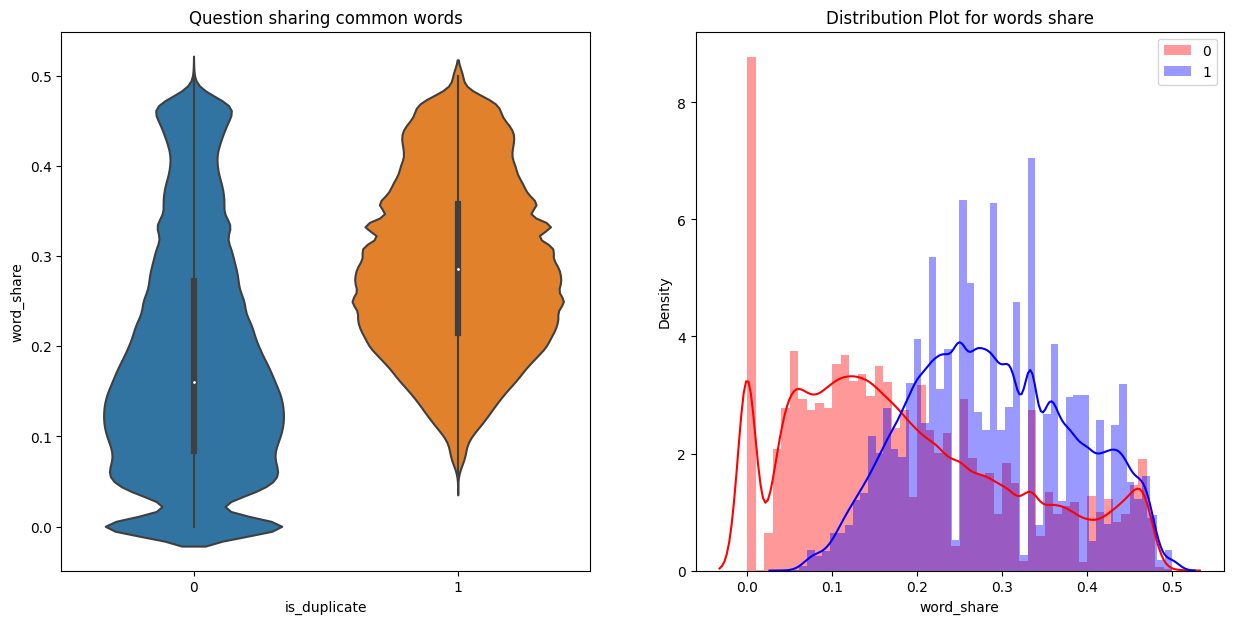

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Question sharing common words")
sns.violinplot(x="is_duplicate", y="word_share", data=df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df["is_duplicate"] == 0.0]["word_share"][0:], label='0', color='red')
sns.distplot(df[df['is_duplicate'] == 1.0]["word_share"][0:], label='1', color='blue')
plt.legend()
plt.title("Distribution Plot for words share")
plt.show()

<h3> 1.5.3 Analysing feature Word_common.

---



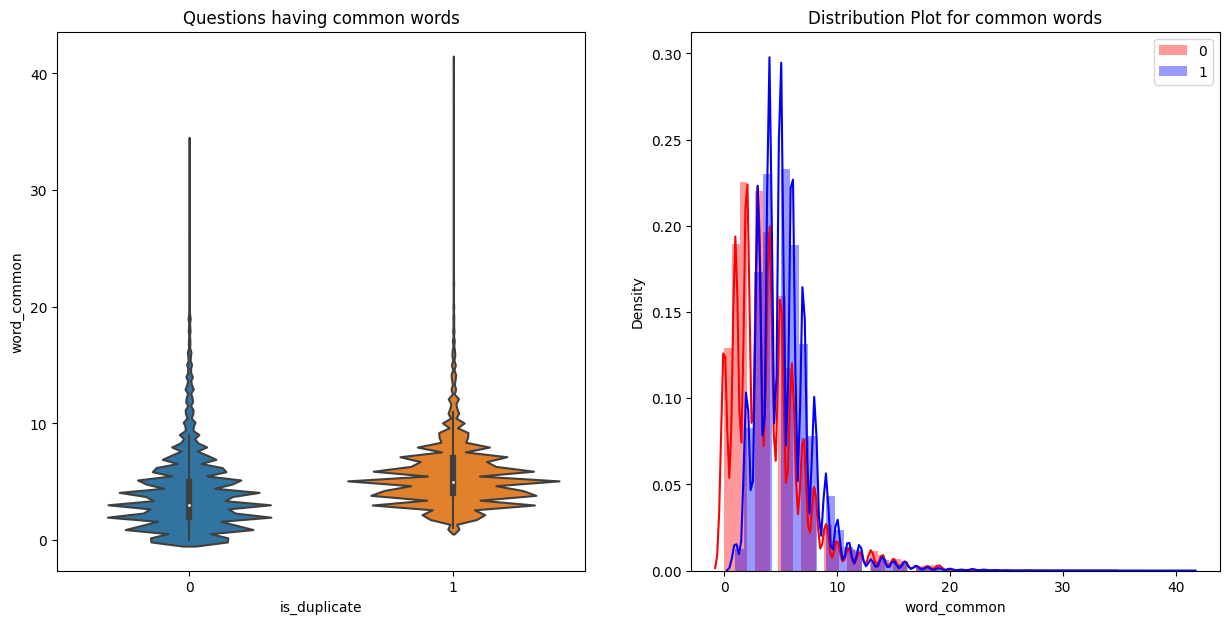

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Questions having common words")
sns.violinplot(x='is_duplicate', y='word_common', data=df)

plt.subplot(1,2,2)
plt.title("Distribution Plot for common words")
sns.distplot(df[df['is_duplicate'] == 0.0]['word_common'][0:], label='0', color='red')
sns.distplot(df[df['is_duplicate'] == 1.0]['word_common'][0:], label='1', color='blue')
plt.legend()
plt.show()

<h2>1.6 Preprocessing Text</h1>

<h3>1.6.1 The preprocess() function applies various text cleaning and normalization techniques to the input text, such as converting to lowercase, replacing specific patterns or words, stemming, and removing HTML tags. These steps help standardize and clean the text data for further analysis or processing.

In [ ]:
STOP_WORDS = stopwords.words("english")
SAFE_DIV = 0.00001

def preprocess(x):
  x = str(x).lower()
  x = x.replace(',000,000', 'm').replace(',000', 'k').replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
  x = re.sub(r"([0-9]+)000000", r"\1m",x)
  x = re.sub(r"([0-9]+)000" , r"\1k",x)

  porter = PorterStemmer()
  pattern = re.compile("\W")

  if type(x) == type(''):
      x = re.sub(pattern, " ",x)

  if type(x) ==  type(''):
      x = porter.stem(x)
      example = BeautifulSoup(x)
      x = example.get_text()

  return x

<h3>1.6.2 The token_feature list, containing calculated features, is returned by the function. These features can be useful for further analysis or modeling tasks involving natural language processing and question similarity. Also creating the new datafield with these new features.

In [ ]:
def get_token_feature(q1,q2):
  token_feature = [0.0]*10
  q1_token = q1.split()
  q2_token = q2.split()
  if(len(q1_token) == 0 or len(q2_token) == 0):
      return token_feature
  q1_stop = set([word for word in q1_token if word in STOPWORDS])
  q2_stop = set([word for word in q2_token if word in STOPWORDS])

  q1_word = set([word for word in q1_token if word not in STOPWORDS])
  q2_word = set([word for word in q2_token if word not in STOPWORDS])

  common_word_count  = len(q1_word.intersection(q2_word))
  common_stop_count  = len(q2_stop.intersection(q2_stop))
  common_token_count = len(set(q1_token).intersection(set(q2_token)))

  token_feature[0] = common_word_count / (min(len(q1_word) , len(q2_word)) + SAFE_DIV)
  token_feature[1] = common_word_count / (max(len(q1_word) , len(q2_word)) + SAFE_DIV)
  token_feature[2] = common_stop_count / (min(len(q1_stop) , len(q2_word)) + SAFE_DIV)
  token_feature[3] = common_stop_count / (max(len(q1_stop) , len(q2_stop)) + SAFE_DIV)
  token_feature[4] = common_token_count / (min(len(q1_token) , len(q2_token)) + SAFE_DIV)
  token_feature[5] = common_token_count / (max(len(q1_token) , len(q2_token)) + SAFE_DIV)
  token_feature[6] = int(q1_token[-1] == q2_token[-1])
  token_feature[7] = int(q1_token[0] == q2_token[0])
  token_feature[8] = abs(len(q1_token) - len(q2_token))
  token_feature[9] = (len(q1_token) + len(q2_token)) / 2
  return token_feature

# Getting longest common sub string in question1 and question2
def get_longest_common_substring(a,b):
  string = list(distance.lcsubstrings(a,b))
  if len(string) == 0:
    return 0
  else:
    return len(string[0]) / (min(len(a) , len(b)) +1)

def extract_features(df):

  df['question1'] = df['question1'].fillna('').apply(preprocess)
  df['question2'] = df['question2'].fillna('').apply(preprocess)

  token_feature  = df.apply(lambda x: get_token_feature (x['question1'], x['question2']), axis = 1)
  
  df['cwc_min']                     = list(map(lambda x: x[0] , token_feature))
  df['cwc_max']                     = list(map(lambda x: x[1] , token_feature))
  df['csc_min']                     = list(map(lambda x: x[2] , token_feature))
  df['csc_max']                     = list(map(lambda x: x[3] , token_feature))
  df['ctc_min']                     = list(map(lambda x: x[4] , token_feature))
  df['ctc_max']                     = list(map(lambda x: x[5] , token_feature))
  df['last_word_common']            = list(map(lambda x: x[6] , token_feature))
  df['first_word_common']           = list(map(lambda x: x[7] , token_feature))
  df['abs_len_diff']                = list(map(lambda x: x[8] , token_feature))
  df['mean_ratio']                  = list(map(lambda x: x[9] , token_feature))

  df['fuzz_ratio']                  = df.apply(lambda x: fuzz.QRatio(x['question1'] , x['question2']), axis=1)
  df['fuzz_partial_ratio']          = df.apply(lambda x: fuzz.partial_ratio(x['question1'] , x['question2']), axis=1)
  df['token_set_ratio']             = df.apply(lambda x: fuzz.token_set_ratio(x['question1'] , x['question2']), axis=1)
  df['token_sort_ratio']            = df.apply(lambda x: fuzz.token_sort_ratio(x['question1'] , x['question2']), axis=1)
  df['longest_common_substring']    = df.apply(lambda x: get_longest_common_substring(x['question1'] , x['question2']), axis=1)
  return df

In [ ]:
if os.path.isfile("/content/gdrive/My Drive/Quora/nlp_feature_train.csv"):
  df2 = pd.read_csv("/content/gdrive/My Drive/Quora/nlp_feature_train.csv")
else:
  df2 = pd.read_csv("/content/gdrive/My Drive/Quora/train.csv")
  df2 = extract_features(df2)
  df2.to_csv("/content/gdrive/My Drive/Quora/nlp_feature_train.csv" , index=False)

In [ ]:
df2.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999998   
1  what would happen if the indian government sto...             0  0.799998   

    cwc_max   csc_min   csc_max  ...   ctc_max  last_word_common  \
0  0.833332  1.199998  0.999998  ...  0.785714               0.0   
1  0.444444  0.999998  0.999998  ...  0.466666               0.0   

   first_word_common  abs_len_diff  mean_ratio  fuzz_ratio  \
0                1.0           2.0        13.0          93   
1                1.0           5.0        12.5          66   

   fuzz_partial_ratio  token_set_ratio  token_sort_ratio  \
0                 100              100                93   
1                  75               86                63   

   longest_common_substring  
0                  0.982759  
1                  0.596154  

[2 rows x 21 columns]

<h2>1.7 Analysing Extracting Features</h2>

In [ ]:
# Creating and Saving positive and negative questios.
df_duplicate    = df2[df2['is_duplicate'] == 1]
df_nonduplicate = df2[df2['is_duplicate'] == 0]

p = np.dstack([df_duplicate["question1"] , df_duplicate["question2"]]).flatten()
n = np.dstack([df_nonduplicate["question1"] , df_nonduplicate["question2"]]).flatten()

print("Number of data points in duplicate questions are {}".format(len(p)))
print("Number of data points in non_duplicate questions are {}".format(len(n)))

np.savetxt("/content/gdrive/My Drive/Quora/train_p.txt", p , fmt='%s', delimiter=' ')
np.savetxt("/content/gdrive/My Drive/Quora/train_n.txt", n , fmt='%s', delimiter=' ')

Number of data points in duplicate questions are 298526
Number of data points in non_duplicate questions are 510054


In [ ]:
link = path.dirname("/content/gdrive/My Drive/Quora/")
textp_w = open(path.join(link, "train_p.txt")).read()
textn_w = open(path.join(link, "train_n.txt")).read()

In [ ]:
stopwords = set(STOPWORDS)
stopwords.add(" ")
stopwords.remove("not")
stopwords.remove("no")
print("Number of words in duplicate pair of questions :",format(len(textp_w)))
print("Number of words in non duplicate pair of questions :",format(len(textn_w)))

Number of words in duplicate pair of questions : 16109886
Number of words in non duplicate pair of questions : 33193067


<h2>1.8 Building Wordloud

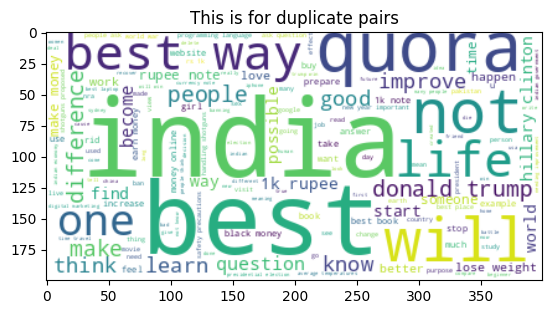

In [ ]:
wc = WordCloud(stopwords=stopwords , background_color='white' , max_words=len(textp_w))
wc.generate(textp_w)
plt.title("This is for duplicate pairs")
plt.imshow(wc , interpolation='bilinear',)
#plt.axis('off')
plt.show()

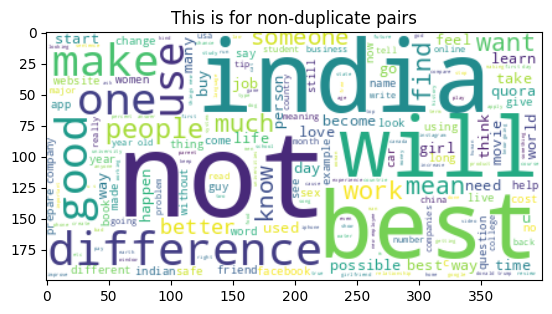

In [ ]:
wc = WordCloud(stopwords=stopwords , background_color='white' , max_words=len(textn_w))
wc.generate(textn_w)
plt.title("This is for non-duplicate pairs")
plt.imshow(wc , interpolation='bilinear')
#plt.axis("off")
plt.show()

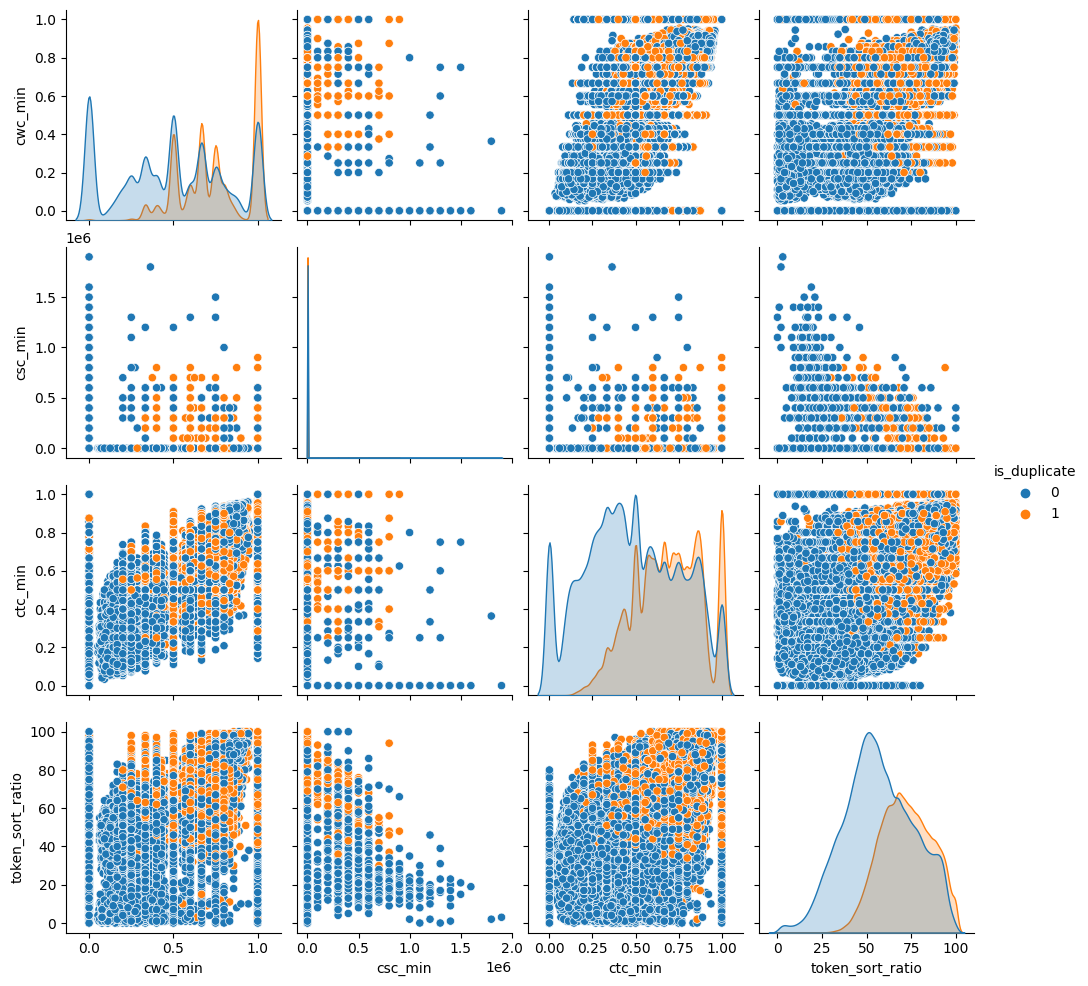

In [ ]:
df2.shape[0]
sns.pairplot(df2 , hue='is_duplicate' , vars = ['cwc_min' , 'csc_min', 'ctc_min' , 'token_sort_ratio'])
plt.show()

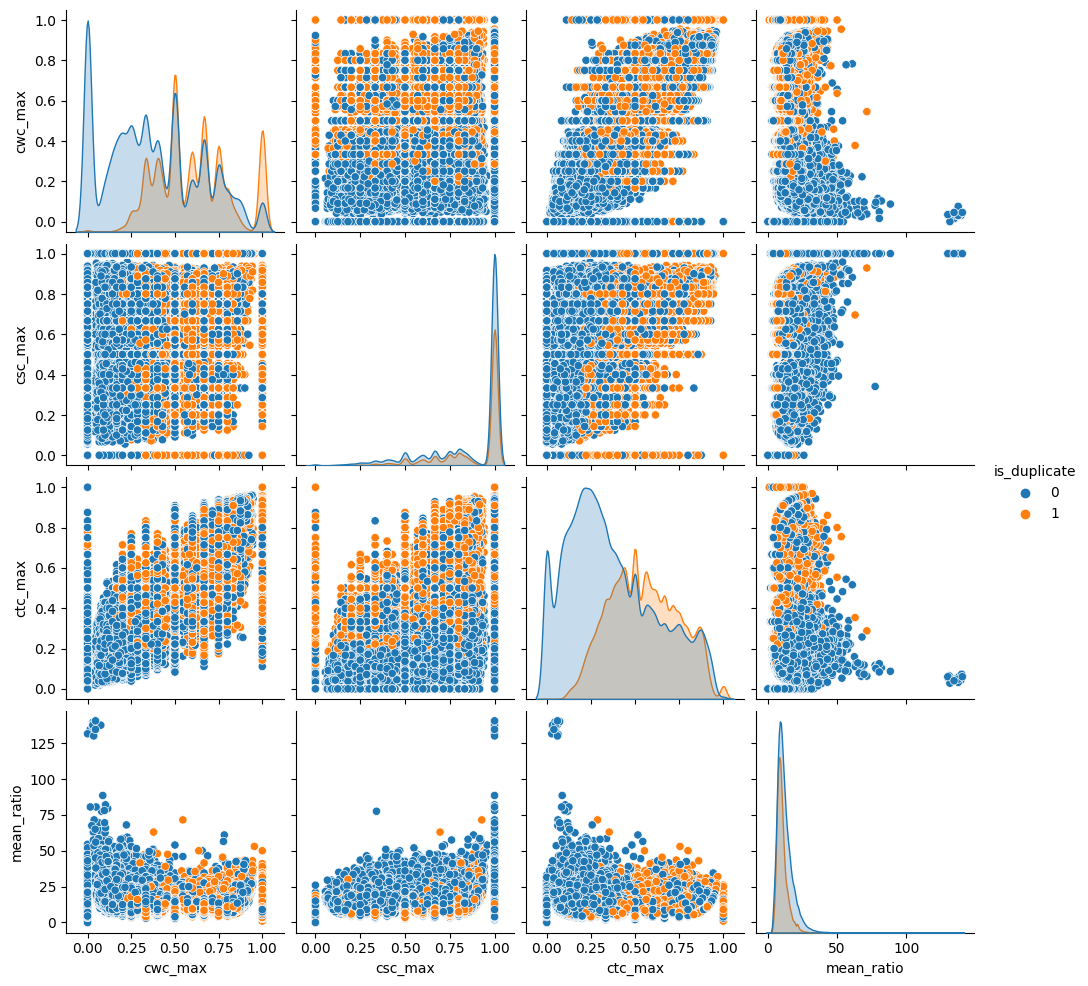

In [ ]:
df2.shape[0]
sns.pairplot(df2[['cwc_max' , 'csc_max' , 'ctc_max' ,'mean_ratio', 'is_duplicate']] , hue='is_duplicate' , vars = ['cwc_max' , 'csc_max' , 'ctc_max' ,'mean_ratio'])
plt.show()

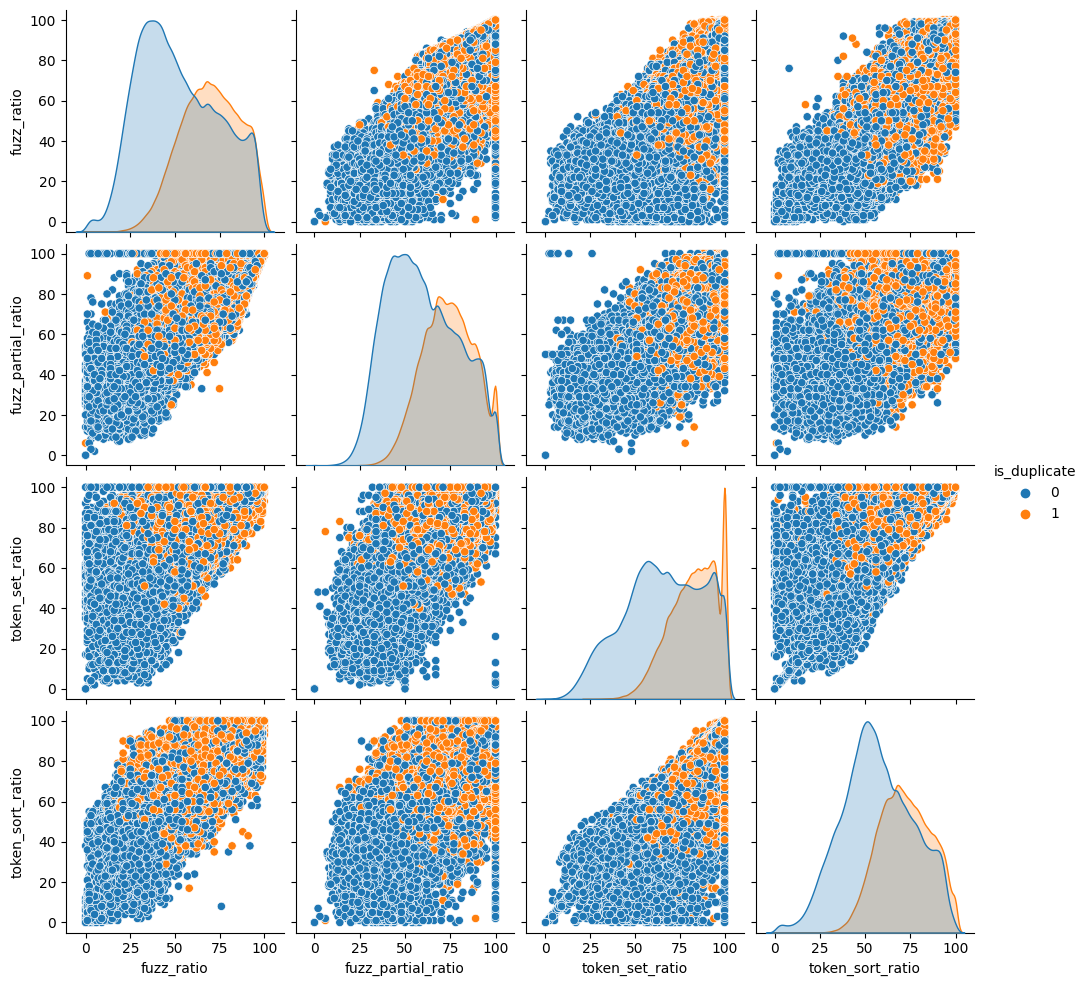

In [ ]:
df2.shape[0]
sns.pairplot(df2[['fuzz_ratio' , 'fuzz_partial_ratio' , 'token_set_ratio' , 'token_sort_ratio', 'is_duplicate']] , hue='is_duplicate' , vars=['fuzz_ratio' , 'fuzz_partial_ratio' , 'token_set_ratio' , 'token_sort_ratio', ])
plt.show()

<h2>1.9 Plotting Violin Plot and Distributed Plot for feature Token sort ratio.

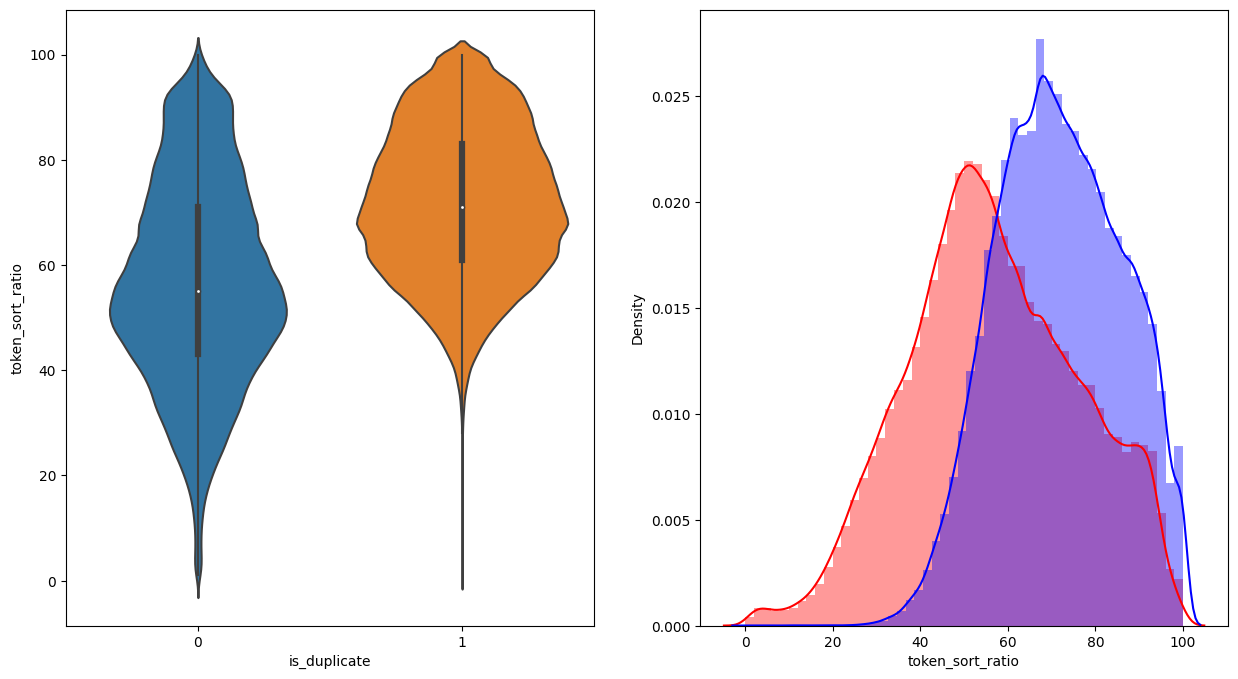

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate' , y='token_sort_ratio' , data = df2)

plt.subplot(1,2,2)
sns.distplot(df2[df2['is_duplicate'] == 0.0] ['token_sort_ratio'] , label = '0' , color = 'red' )
sns.distplot(df2[df2['is_duplicate'] == 1.0] ['token_sort_ratio'] , label = '1' , color = 'blue')
plt.show()

<h2>1.10 Plotting Violin Plot and Distributed Plot for feature Longest common substring.

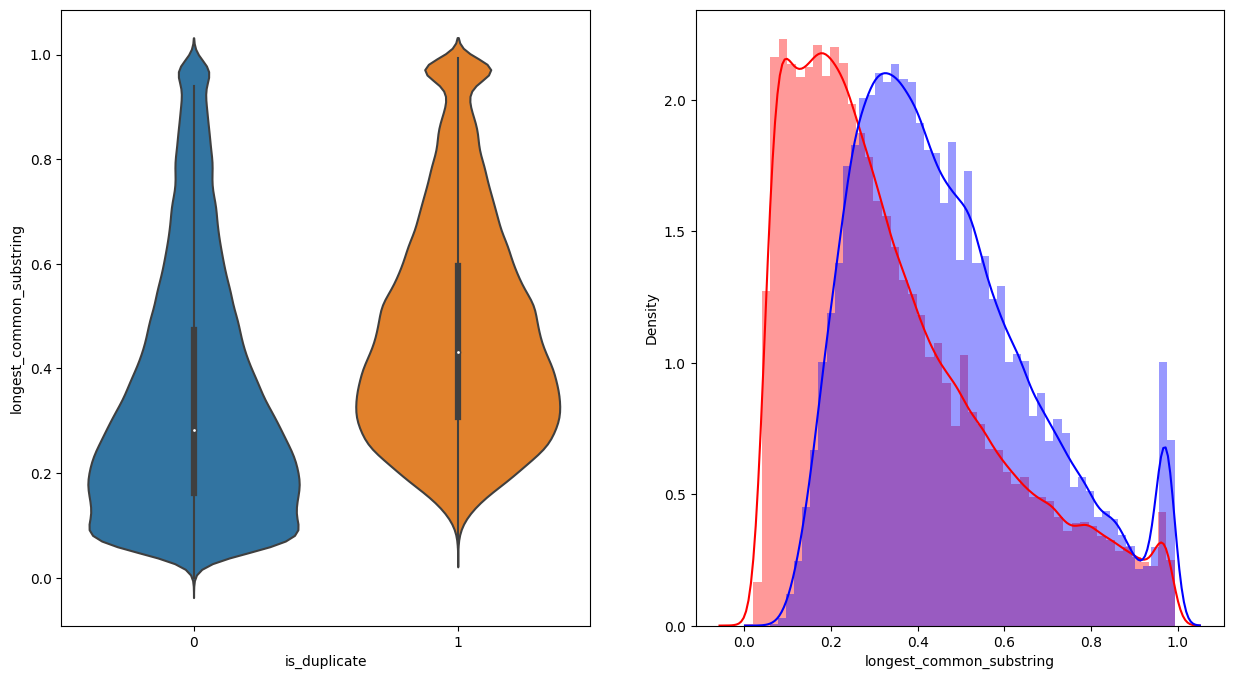

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.violinplot(x='is_duplicate' , y='longest_common_substring' , data = df2)

plt.subplot(1,2,2)
sns.distplot(df2[df2['is_duplicate'] == 0.0] ['longest_common_substring'] , label = '0' , color = 'red' )
sns.distplot(df2[df2['is_duplicate'] == 1.0] ['longest_common_substring'] , label = '1' , color = 'blue')
plt.show()

<h2>1.11 Scale the data between 0 and 1. For this we use MinMaxScaler

In [ ]:
df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1_len', 'q2_len', 'q1_n_words',
       'q2_n_words', 'word_common', 'word_total', 'word_share',
       'freq_qid1+qid2', 'freq_qid1-qid2'],
      dtype='object')

In [ ]:
df2.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_common', 'first_word_common', 'abs_len_diff', 'mean_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_set_ratio',
       'token_sort_ratio', 'longest_common_substring'],
      dtype='object')

In [ ]:
# ust taking sample size.
df2_sample = df2[0:10000]
x = MinMaxScaler().fit_transform(df2_sample[['cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max','last_word_common', 'first_word_common', 'abs_len_diff', 'mean_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_set_ratio','token_sort_ratio', 'longest_common_substring']])
y = df2_sample['is_duplicate']

<h2>1.12 Plotting using TSNE

<h3>1.12.1 t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in a lower-dimensional space. It is particularly useful for exploring and understanding complex patterns and structures in data.

<h3>The main idea behind t-SNE is to represent each data point as a two- or three-dimensional point on a scatter plot while preserving the local structure and relationships between data points from the original high-dimensional space. It accomplishes this by modeling the similarity between data points in both the high-dimensional and low-dimensional spaces.

In [ ]:
# 2D TSNE
tsne_2d_per50 = TSNE(n_components = 2, verbose=2, init='random', perplexity= 50, n_iter=2000, random_state=100).fit_transform(x)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 1.149s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.120331
[t-SNE] Computed conditional probabilities in 0.506s
[t-SNE] Iteration 50: error = 88.8469849, gradient norm = 0.0610815 (50 iterations in 6.114s)
[t-SNE] I

In [ ]:
tsne_2d_per30 = TSNE(n_components = 2, verbose=2, init='random', perplexity= 30, n_iter=2000, random_state=100).fit_transform(x)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.041s...
[t-SNE] Computed neighbors for 10000 samples in 1.459s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.105406
[t-SNE] Computed conditional probabilities in 0.459s
[t-SNE] Iteration 50: error = 95.7614594, gradient norm = 0.0575702 (50 iterations in 4.254s)
[t-SNE] It

In [ ]:
tsne_2d_per70 = TSNE(n_components = 2, verbose=2, init='random', perplexity= 70, n_iter=2000, random_state=100).fit_transform(x)

[t-SNE] Computing 211 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 1.546s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.131321
[t-SNE] Computed conditional probabilities in 0.991s
[t-SNE] Iteration 50: error = 84.4456558, gradient norm = 0.0660212 (50 iterations in 5.640s)
[t-SNE] I

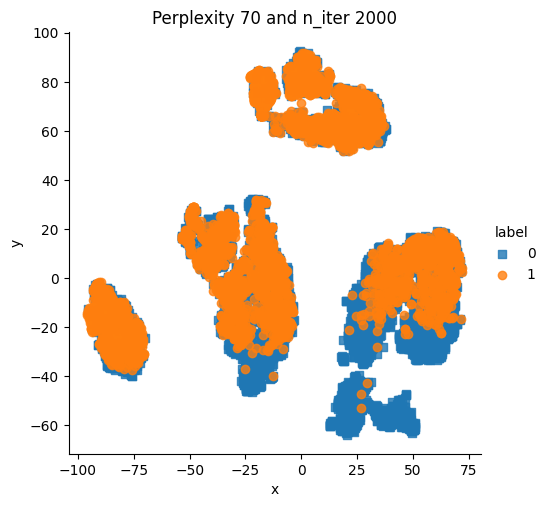

In [ ]:
df = pd.DataFrame({'x': tsne_2d_per70[ :,0], 'y': tsne_2d_per70[ :,1], 'label':y})
sns.lmplot(data=df, x='x', y='y', hue='label', markers=['s','o'], fit_reg=False, height=5)
plt.title("Perplexity {} and n_iter {}".format(70,2000))
plt.show()

<h2>1.13 Lets do some text Preprocessing with Tfidf Word Vector</h3>

In [ ]:
df = pd.read_csv("/content/gdrive/My Drive/Quora/train.csv")
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

<h3>1.13.1 The below code segment calculates the TF-IDF values for the words present in the 'question1' and 'question2' columns of the DataFrame and creates a dictionary mapping each word to its IDF value.


In [ ]:
question = list(df['question1']) + list(df['question2'])
tfidf = TfidfVectorizer(lowercase=False)
tfidf.fit_transform(question)
word2tfidf = dict(zip(tfidf.get_feature_names_out(), tfidf.idf_))

<h3>1.13.2 The below code snippet calculates the mean word vectors for each question in the 'question1' column of the DataFrame using word vectors provided by the spaCy model. It also incorporates IDF values from the word2tfidf dictionary to weight the word vectors before calculating the mean.

In [ ]:
# the en_core_web_sm model from the spaCy library is loaded using spacy.load('en_core_web_sm'). This model is trained on English
# language text and provides word vectors and linguistic annotations.
nlp = spacy.load('en_core_web_sm')
vec1 = []
for qu1 in tqdm(list(df['question1'])):
  doc1 = nlp(qu1)
  mean_vect1 = np.zeros([len(doc1) , len(doc1[0].vector)])
  for word1 in doc1:
    vect1 = word1.vector
    try:
      idf = word2tfidf[str(word1)]
    except:
      idf = 0
    mean_vect1 += vect1 * idf
  mean_vect1 = mean_vect1.mean(axis=0)
  vec1.append(mean_vect1)
df['q1_feat_m'] = list(vec1)

100%|██████████| 404290/404290 [54:23<00:00, 123.87it/s]


In [ ]:
vec2 = []
for qu2 in tqdm(list(df['question2'])):
  doc2 = nlp(qu2)
  mean_vect2 = np.zeros([len(doc2) , len(doc2[0].vector)])
  for word2 in doc2:
    vect2 = word2.vector
    try:
      idf = word2tfidf[str(word2)]
    except:
      idf = 0
    mean_vect2 += vect2 * idf
  mean_vect2 = mean_vect2.mean(axis=0)
  vec2.append(mean_vect2)
df['q2_feat_m'] = list(vec2)

100%|██████████| 404290/404290 [47:34<00:00, 141.65it/s]


In [ ]:
# Load the dataset if present in the given location else compute it.
if os.path.isfile("/content/gdrive/My Drive/Quora/basic_feature_extraction.csv"):
  df_basic_feat = pd.read_csv("/content/gdrive/My Drive/Quora/basic_feature_extraction.csv", encoding='latin-1')
else:
  print("Compute the basic feature extraction.")

if os.path.isfile("/content/gdrive/My Drive/Quora/nlp_feature_train.csv"):
  df_nlp_feat = pd.read_csv("/content/gdrive/My Drive/Quora/nlp_feature_train.csv", encoding='latin-1')
else:
  print("Compute the nlp feature train.")

In [ ]:
df_basic_feat.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'freq_qid1', 'freq_qid2', 'q1_len', 'q2_len', 'q1_n_words',
       'q2_n_words', 'word_common', 'word_total', 'word_share',
       'freq_qid1+qid2', 'freq_qid1-qid2'],
      dtype='object')

In [ ]:
df_nlp_feat.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_common', 'first_word_common', 'abs_len_diff', 'mean_ratio',
       'fuzz_ratio', 'fuzz_partial_ratio', 'token_set_ratio',
       'token_sort_ratio', 'longest_common_substring'],
      dtype='object')

In [ ]:
# dropping bunch of columns for future use.
df1    = df_basic_feat.drop(['qid1','qid2','question1','question2'] , axis=1)
df2    = df_nlp_feat.drop(['qid1', 'qid2', 'question1', 'question2','is_duplicate'],axis = 1)
df3    = df.drop(['qid1', 'qid2', 'question1', 'question2','is_duplicate'],axis = 1)
df3_q1 = pd.DataFrame(df.q1_feat_m.values.tolist(), index=df3.index)
df3_q2 = pd.DataFrame(df.q2_feat_m.values.tolist(), index=df3.index)

In [ ]:
print("Number of features in Basic Features Extraction: {}".format(df1.shape[1]))
df1.head(2)

Number of features in Basic Features Extraction: 13


id  is_duplicate  freq_qid1  freq_qid2  q1_len  q2_len  q1_n_words  \
0   0             0          1          1      66      57          14   
1   1             0          4          1      51      88           8   

   q2_n_words  word_common  word_total  word_share  freq_qid1+qid2  \
0          12         10.0        23.0    0.434783               2   
1          13          4.0        20.0    0.200000               5   

   freq_qid1-qid2  
0               0  
1               3

In [ ]:
print("Number of features in NLP Features Extraction: {}".format(df2.shape[1]))
df2.head(2)

Number of features in NLP Features Extraction: 16


id   cwc_min   cwc_max   csc_min   csc_max   ctc_min   ctc_max  \
0   0  0.999998  0.833332  1.199998  0.999998  0.916666  0.785714   
1   1  0.799998  0.444444  0.999998  0.999998  0.699999  0.466666   

   last_word_common  first_word_common  abs_len_diff  mean_ratio  fuzz_ratio  \
0               0.0                1.0           2.0        13.0          93   
1               0.0                1.0           5.0        12.5          66   

   fuzz_partial_ratio  token_set_ratio  token_sort_ratio  \
0                 100              100                93   
1                  75               86                63   

   longest_common_substring  
0                  0.982759  
1                  0.596154

In [ ]:
print("Number of features in question1 W2V: {}".format(df3_q1.shape[1]))
df3_q1.head(2)

Number of features in question1 W2V: 96


0          1          2          3          4          5   \
0  16.463361 -45.934091   9.832647 -19.447243  16.256219 -11.408626   
1 -15.513324 -26.773417  22.476599  38.939703  31.664113  11.493576   

          6          7         8          9   ...         86         87  \
0  45.781352  33.793397 -0.682307  10.741596  ...  10.027314 -33.372701   
1  18.258106  56.702155  3.560213 -46.756693  ...  -6.072477  23.089771   

          88         89         90        91         92         93         94  \
0 -48.610679  23.520850 -20.693862  9.707474  44.017382  68.670248 -17.080289   
1 -38.483047  35.745365 -14.073059  7.308269  89.132784   3.295301   0.226582   

          95  
0  33.657361  
1  88.639381  

[2 rows x 96 columns]

In [ ]:
print("Number of features in question2 W2V: {}".format(df3_q2.shape[1]))
df3_q2.head(2)

Number of features in question2 W2V: 96


0          1         2          3         4         5          6   \
0  17.591981 -45.190796  5.264223 -16.323098  8.937831 -9.328999  39.247610   
1 -22.684552 -72.190479 -6.707384  36.345242  8.030883 -5.487780   8.623339   

          7          8          9   ...         86         87         88  \
0  41.735712 -10.110290  13.893757  ...  12.478954 -30.068915 -47.913707   
1  36.662616  -7.383572 -39.861679  ...   4.830299  19.611342 -35.900325   

          89         90        91         92         93         94         95  
0  14.714811 -17.241791  6.486735  26.456941  63.701761 -17.887825  21.516744  
1  45.733032  -2.857659  5.916804  82.456646  34.427442  -0.153906  83.436959  

[2 rows x 96 columns]

In [3]:
# Load the dataset if present in the drive else merge the above dataframes and create one final dataframe.
if os.path.isfile("/content/gdrive/My Drive/Quora/final_feature.csv"):
  final_df = pd.read_csv("/content/gdrive/My Drive/Quora/final_feature.csv")
  final_df.head()
else:
  df3_q1['id'] = df1['id']
  df3_q2['id'] = df1['id']
  df1 = df1.merge(df2 , on='id', how='left')
  df3_q1 = df3_q1.merge(df3_q2 , on='id', how='left')
  result = df1.merge(df3_q1 , on='id' , how='left')
  result.to_csv("/content/gdrive/My Drive/Quora/final_feature.csv")
  result.head()

In [4]:
# if you get NameError then recompute the above cell.
final_df.head()

Unnamed: 0  id  is_duplicate  freq_qid1  freq_qid2  q1_len  q2_len  \
0           0   0             0          1          1      66      57   
1           1   1             0          4          1      51      88   
2           2   2             0          1          1      73      59   
3           3   3             0          1          1      50      65   
4           4   4             0          3          1      76      39   

   q1_n_words  q2_n_words  word_common  ...       86_y       87_y       88_y  \
0          14          12         10.0  ...  12.478954 -30.068915 -47.913707   
1           8          13          4.0  ...   4.830299  19.611342 -35.900325   
2          14          10          4.0  ...  51.079303 -11.944441 -51.070305   
3          11           9          0.0  ...  22.016934   8.856643  -6.845009   
4          13           7          2.0  ...  -3.956318 -13.591868 -26.024702   

        89_y       90_y       91_y       92_y       93_y       94_y       95_y  
0  14.714811 -17.241791   6.486735  26.456941  63.701761 -17.887825  21.516744  
1  45.733032  -2.857659   5.916804  82.456646  34.427442  -0.153906  83.436959  
2  12.397111 -19.068658  -5.625132  48.529716  48.813840  -6.016337  10.582175  
3  22.816601   0.418034 -18.978339   9.303711  41.359689   4.616394  32.863481  
4  13.573341 -10.809346  -2.419427  35.918892  36.435138 -10.428509  16.641590  

[5 rows x 221 columns]

In [ ]:
print("*"*20,"Columns in final data",20*"*")
for i in final_df.columns:
  print(i)

******************** Columns in final data ********************
Unnamed: 0
id
is_duplicate
freq_qid1
freq_qid2
q1_len
q2_len
q1_n_words
q2_n_words
word_common
word_total
word_share
freq_qid1+qid2
freq_qid1-qid2
cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_common
first_word_common
abs_len_diff
mean_ratio
fuzz_ratio
fuzz_partial_ratio
token_set_ratio
token_sort_ratio
longest_common_substring
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y

<h2>1.14 Separating data for X's and Y's

In [5]:
x = final_df.drop(['Unnamed: 0','id','is_duplicate'], axis=1)
y = final_df['is_duplicate']

In [6]:
print(x.shape)
print(y.shape)

(404290, 218)
(404290,)


<h2>1.15 Splitting data for Train(70%) and Test(30%)

<h3>NOTE: You can split data into train, cross validate and test dataset into the ratio 70:15:15 respectivelly.

In [7]:
# Splitting the dataset in train and test.
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size=0.3, random_state= 1 )
print("Number of points in X-Train : {}".format(x_train.shape))
print("Number of points in Y-Train : {}".format(y_train.shape))
print("Number of points in X-Test : {}".format(x_test.shape))
print("Number of points in Y-Test : {}".format(y_test.shape))

Number of points in X-Train : (283003, 218)
Number of points in Y-Train : (283003,)
Number of points in X-Test : (121287, 218)
Number of points in Y-Test : (121287,)


<h3>1.15.1 The below code provides insights into the class distribution of the training and test sets by calculating the percentage of data points belonging to each class.

In [8]:
train_dist = Counter(y_train) # Counter output---> Counter({0: 178655, 1: 104348})
train_len  = len(y_train)
print("*"*20,"Distribution of Train Data Points","*"*20)
print("Class [0] contain",round((int(train_dist[0])/train_len)*100,2),"% of data" ," & Class [1] contain" ,round((int(train_dist[1])/train_len)*100,2), "% of data\n")

test_dist = Counter(y_test)
test_len  = len(y_test)
print("-"*80)
print("*"*20,"Distribution of Test Data Points","*"*20)
print("Class [0] contain",round((int(test_dist[0])/test_len)*100,2),"% of data" ," & Class [1] contain" ,round((int(test_dist[1])/test_len)*100,2), "% of data")

******************** Distribution of Train Data Points ********************
Class [0] contain 63.13 % of data  & Class [1] contain 36.87 % of data

--------------------------------------------------------------------------------
******************** Distribution of Test Data Points ********************
Class [0] contain 62.97 % of data  & Class [1] contain 37.03 % of data


<h3> 1.15.3 The below code snippet defines a function to plot the confusion matrix, precision matrix, and recall matrix based on the predicted and true labels. It provides visual representations of the performance metrics for a classification model.

In [9]:
'''

                 Predicted Negative    Predicted Positive
Actual Negative        TN                      FP
Actual Positive        FN                      TP

To read and interpret a confusion matrix:
1. True Positive (TP): The number of correctly predicted positive instances.
2. True Negative (TN): The number of correctly predicted negative instances.
3. False Positive (FP): The number of instances that were actually negative but incorrectly predicted as positive.
4. False Negative (FN): The number of instances that were actually positive but incorrectly predicted as negative.

Here are some common evaluation metrics derived from a confusion matrix:
1. Accuracy: (TP + TN) / (TP + TN + FP + FN)
2. Precision: TP / (TP + FP)
3. Recall (Sensitivity): TP / (TP + FN)
4. Specificity: TN / (TN + FP)
5. F1-score: 2 * (Precision * Recall) / (Precision + Recall)

'''
def confussion_matrics(y_test , y_predict):
  C = confusion_matrix(y_test , y_predict)
  A = ((C.T/(C.sum(axis=1))).T) # precision
  B = (C/C.sum(axis=0)) # recall
  label= [1,2]
  plt.figure(figsize=(20,5))
  cmap = sns.light_palette("green")

  plt.subplot(1,3,1)
  sns.heatmap(C , annot=True, cmap=cmap, fmt=".3f", xticklabels=label , yticklabels=label)
  plt.xlabel("Predicted Values")
  plt.ylabel("Original Values")
  plt.title("Confussion Matrics")
  

  plt.subplot(1,3,2)
  sns.heatmap(A , annot=True, cmap=cmap, fmt=".3f", xticklabels=label , yticklabels=label)
  plt.xlabel("Predicted Values")
  plt.ylabel("Original Values")
  plt.title("Precision Matrics")
  

  plt.subplot(1,3,3)
  sns.heatmap(B , annot=True, cmap=cmap, fmt=".3f", xticklabels=label , yticklabels=label)
  plt.xlabel("Predicted Values")
  plt.ylabel("Original Values")
  plt.title("Recall Matrics")
  plt.show()

<h2>1.16 Train with Models

<h3>1.16.1 Random model (The Base Model)

<h4>1.16.1.1  The random model provides a useful baseline for evaluating and comparing the performance of other models, acting as a benchmark for the task at hand. It helps us gauge whether our models are learning meaningful patterns and guides us in improving model performance.

Log Loss for Random model is  0.8848137934317463


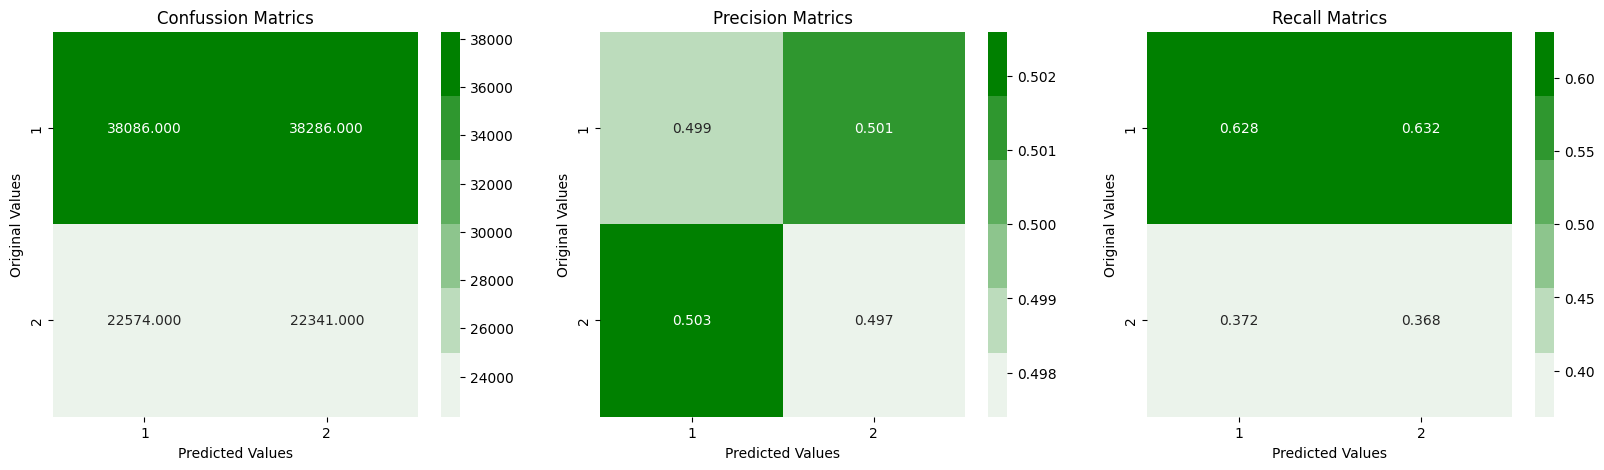

In [ ]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
  rand_probs = np.random.rand(1,2)
  predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log Loss for Random model is ",log_loss(y_test , predicted_y , eps=1e-15))
predicted_y = np.argmax(predicted_y,axis=1)
confussion_matrics(y_test ,predicted_y )

***Observation:*** The logloss for base model is 0.8848137 approx. , so this is acting as the baseline for other good models. If any model whose performance is low then base model then we don't need to waste our time and resources on that.

 <h3>1.16.2 Logistic Regression with L2 penalty (Ridge regularization)

For value of alpha  1e-05  the log loss is 0.6591312472416975
For value of alpha  0.0001  the log loss is 0.6591312472416975
For value of alpha  0.001  the log loss is 0.6591312472416975
For value of alpha  0.01  the log loss is 0.6591312472416975
For value of alpha  0.1  the log loss is 0.6590321877374267
For value of alpha  1  the log loss is 0.6586649819687198
For value of alpha  10  the log loss is 0.615951268379854


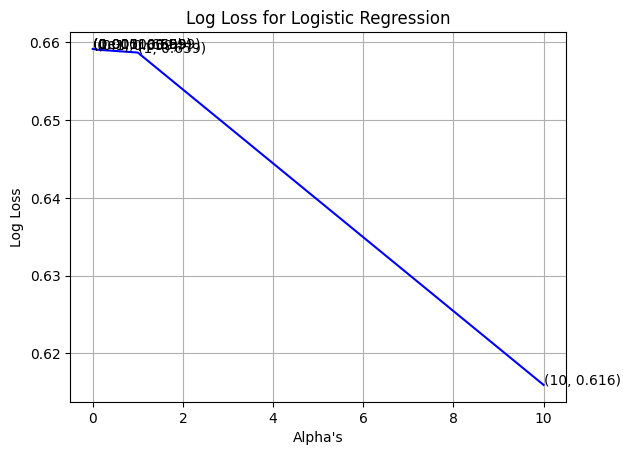

For values of best alpha =  10 The train log loss is: 0.6278197711399485
For values of best alpha =  10 The test log loss is: 0.6285035565298792
Total number of data points : 121287


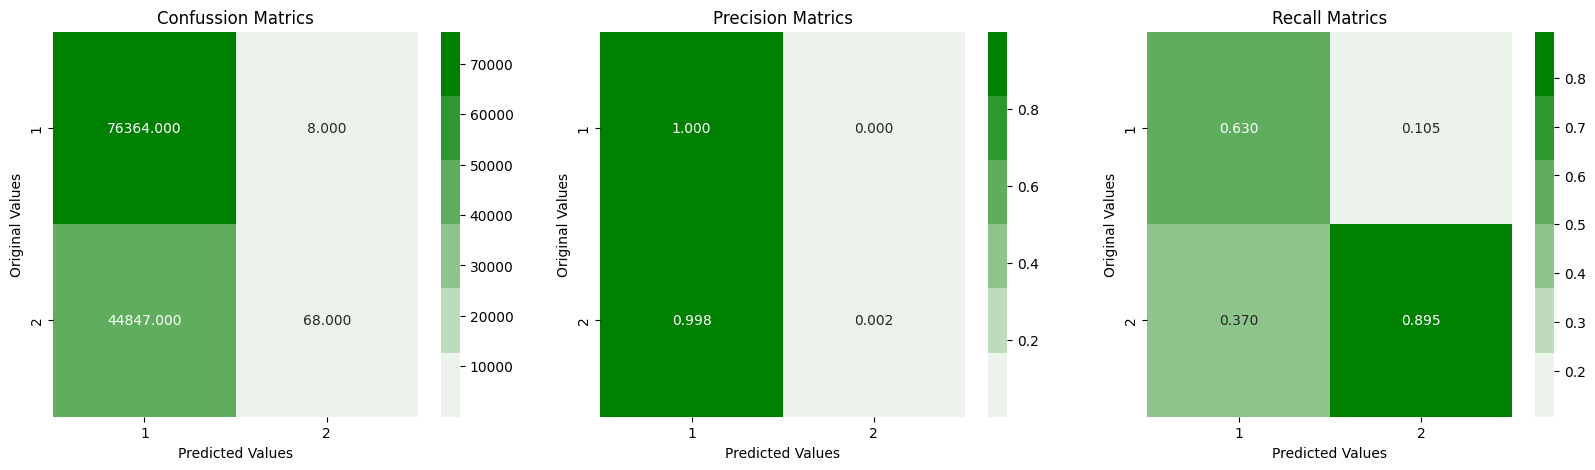

In [ ]:
alpha = [10 ** x for x in range(-5, 2)]
log_loss_error = []
for i in alpha:
  clf = SGDClassifier(alpha = i , penalty='l2', loss='log', random_state=40)
  clf.fit(x_train,y_train)
  sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
  sig_clf.fit(x_train,y_train)
  predicted_y = sig_clf.predict_proba(x_test)
  log_loss_error.append(log_loss(y_test, predicted_y, labels=clf.classes_,eps=1e-15))
  print("For value of alpha ", i , " the log loss is",log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha , log_loss_error, c='b')
for i, txt in enumerate(np.round(log_loss_error,3)):
  ax.annotate((alpha[i], np.round(txt,3)),(alpha[i] , log_loss_error[i]))
plt.grid()
plt.xlabel("Alpha's")
plt.ylabel("Log Loss")
plt.title("Log Loss for Logistic Regression")
plt.show()

best_alpha = np.argmin(log_loss_error)
clf = SGDClassifier(alpha=best_alpha, penalty="l2", loss="log", random_state=40)
clf.fit(x_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(x_train,y_train)

predicted_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))
predicted_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predicted_y,axis=1)
print("Total number of data points :", len(predicted_y))
confussion_matrics(y_test, predicted_y)

***Observation***: Log Reg with L2 penalty performs significantly better on alpha= 10 than our base model with train logloss of 0.627819 and test logloss of 0.628503. Here the both train and test logloss are close to each other which means our model is not underfitting or overfitting. 

<h3>1.16.3 Logistic Regression with L1 penalty (Lasso regularization) 

For value of alpha  1e-05  the log loss is 0.6591312472416975
For value of alpha  0.0001  the log loss is 0.6591312472416975
For value of alpha  0.001  the log loss is 0.6591312472416975
For value of alpha  0.01  the log loss is 0.5723888392046521
For value of alpha  0.1  the log loss is 0.5491409147464268
For value of alpha  1  the log loss is 0.5640828364928245
For value of alpha  10  the log loss is 0.6501958459986898


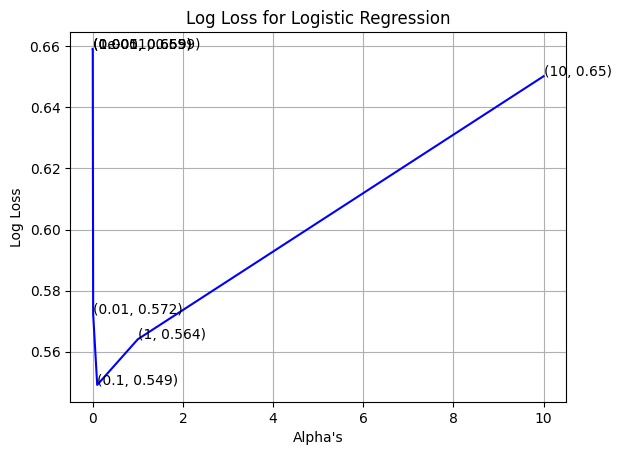

For values of best alpha =  0.1 The train log loss is: 0.5449689443180052
For values of best alpha =  0.1 The test log loss is: 0.5491409147464268
Total number of data points : 121287


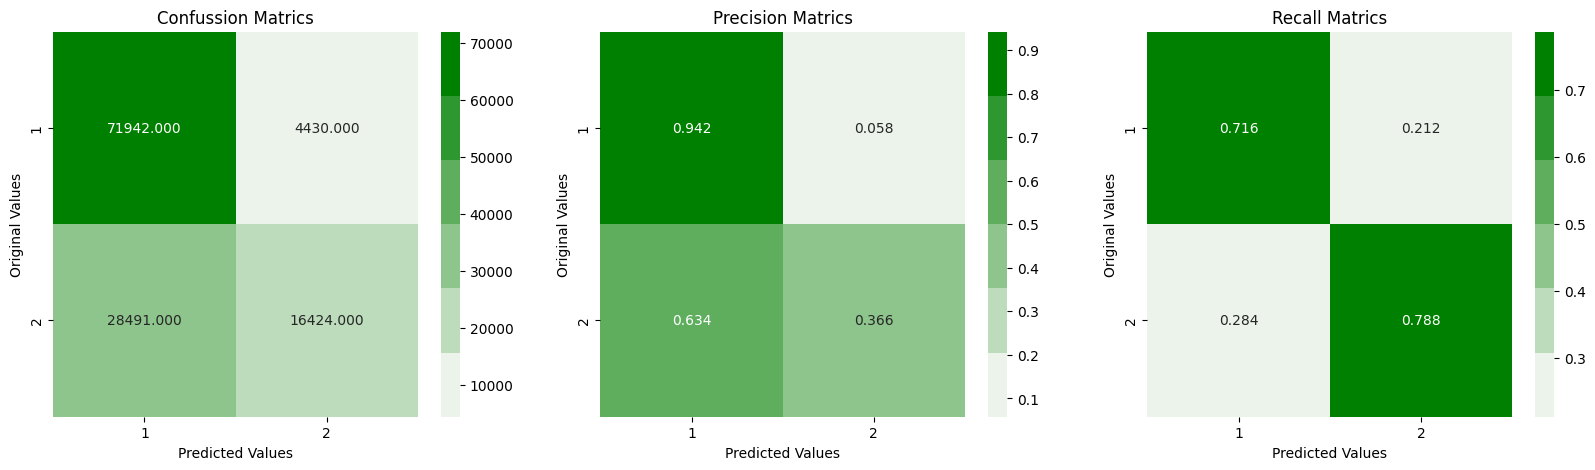

In [ ]:
# L1 penalty creates sparse matrix.
# We can change CalibratedClassifierCV method to 'isotonic' to get the different result.
alpha = [10 ** x for x in range(-5, 2)]
log_loss_error = []
for i in alpha:
  clf = SGDClassifier(alpha = i , penalty='l1', loss='log', random_state=40)
  clf.fit(x_train,y_train)
  sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
  sig_clf.fit(x_train,y_train)
  predicted_y = sig_clf.predict_proba(x_test)
  log_loss_error.append(log_loss(y_test, predicted_y, labels=clf.classes_,eps=1e-15))
  print("For value of alpha ", i , " the log loss is",log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha , log_loss_error, c='b')
for i, txt in enumerate(np.round(log_loss_error,3)):
  ax.annotate((alpha[i], np.round(txt,3)),(alpha[i] , log_loss_error[i]))
plt.grid()
plt.xlabel("Alpha's")
plt.ylabel("Log Loss")
plt.title("Log Loss for Logistic Regression")
plt.show()


best_alpha = np.argmin(log_loss_error)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty="l1", loss="log", random_state=40)
clf.fit(x_train,y_train)
sig_clf = CalibratedClassifierCV(clf, method='sigmoid')
sig_clf.fit(x_train,y_train)

predicted_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-15))
predicted_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predicted_y,axis=1)
print("Total number of data points :", len(predicted_y))
confussion_matrics(y_test, predicted_y)

***Observation***: Log Reg with L1 penalty performs significantly better on alpha= 0.1 than our base model with train logloss of 0.5491409 and test logloss of 0.5491409. Here the both train and test logloss are close to each other which means our model is not underfitting or overfitting. 

<h3>1.16.4 Linear Regression with hyperparameter tunning


For values of alpha =  1e-05 The log loss is: 0.6591312472416975
For values of alpha =  0.0001 The log loss is: 0.6591312472416975
For values of alpha =  0.001 The log loss is: 0.6158199990689317
For values of alpha =  0.01 The log loss is: 0.4973490516430237
For values of alpha =  0.1 The log loss is: 0.5527202322031753
For values of alpha =  1 The log loss is: 0.610489941674193
For values of alpha =  10 The log loss is: 0.6348532020572707


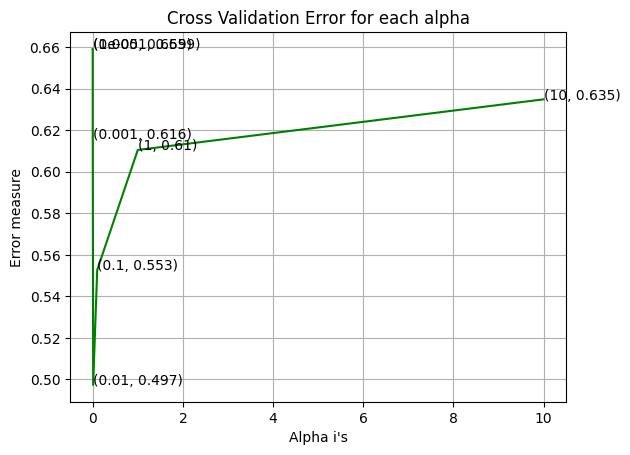

For values of best alpha =  0.01 The train log loss is: 0.4978760458049077
For values of best alpha =  0.01 The test log loss is: 0.4973490516430237
Total number of data points : 121287


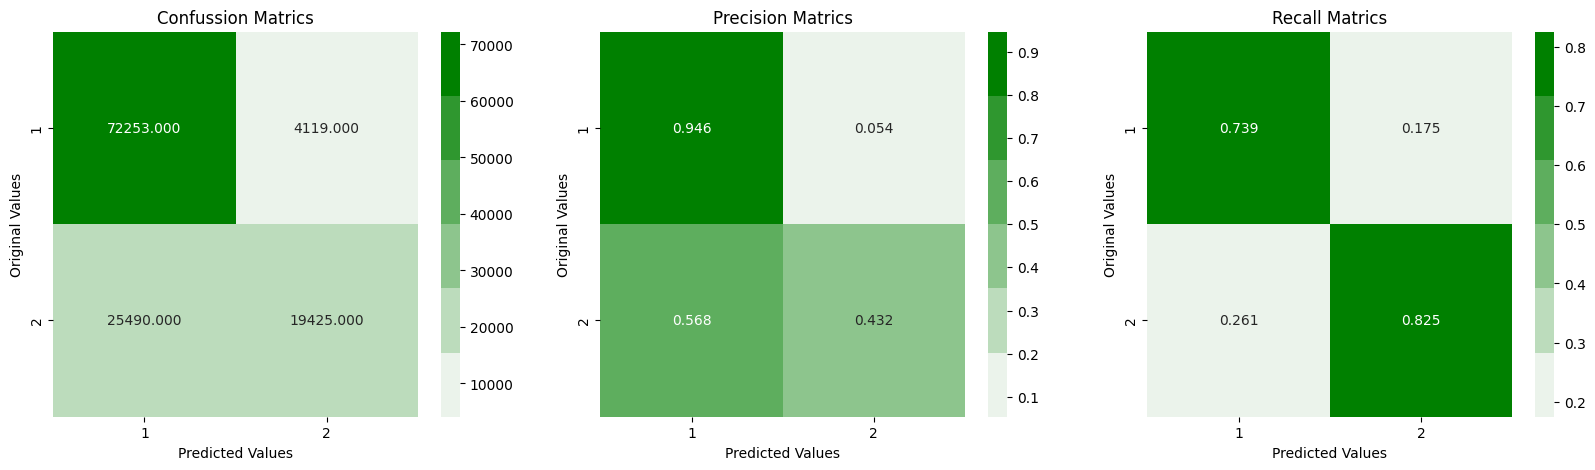

In [ ]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(x_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(x_train, y_train)
    predicted_y = sig_clf.predict_proba(x_test)
    log_error_array.append(log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(x_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(x_train, y_train)

predict_y = sig_clf.predict_proba(x_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(x_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
confussion_matrics(y_test, predicted_y)

***Observation:*** Linear Regression with some hyperparameter tunning get the train logloss of 0.49734905 and test logloss of 0.49734905 with alpha =0.01. Hence Linear Regression performs better than Logistic Regression and no underfitting and overfitting is observed.

<h3>1.16.5 Modeling XG Boost Classifier

1.16.5.1 The code below trains an XGBoost model, evaluates its performance using log loss, performs hyperparameter tuning through randomized search, and visualizes the confusion matrix for the predicted labels.

In [18]:
import xgboost as xgb
from scipy.stats import randint, uniform

learning_rate = uniform(loc=0.01, scale=0.1 - 0.01).rvs()
max_depth = randint(3, 6).rvs()

# Define the parameter grid
param_distributions = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'learning_rate': learning_rate,
    'max_depth': max_depth,
}
d_train = xgb.DMatrix(x_train, label=y_train)
d_test = xgb.DMatrix(x_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(param_distributions, d_train, num_boost_round=100, evals=watchlist,
                early_stopping_rounds=20, verbose_eval=10)

predicted_y = bst.predict(d_test)
print("The test log loss is:", log_loss(y_test, predicted_y))


[0]	train-logloss:0.67712	valid-logloss:0.67713
[10]	train-logloss:0.56222	valid-logloss:0.56217
[20]	train-logloss:0.49983	valid-logloss:0.49975
[30]	train-logloss:0.46292	valid-logloss:0.46284
[40]	train-logloss:0.43928	valid-logloss:0.43922
[50]	train-logloss:0.42360	valid-logloss:0.42357
[60]	train-logloss:0.41216	valid-logloss:0.41211
[70]	train-logloss:0.40387	valid-logloss:0.40382
[80]	train-logloss:0.39752	valid-logloss:0.39755
[90]	train-logloss:0.39280	valid-logloss:0.39291
[99]	train-logloss:0.38918	valid-logloss:0.38930
The test log loss is: 0.3892950443428291


<h4> This can be more reduce with better hyperparameter tunning.

In [ ]:
param_distributions = [{'max_depth': list(range(2,6)), 'max_features': list(range(0,15))} ]
model = XGBClassifier(n_jobs=-1)
model.fit(x_train,y_train)
rand_clf = RandomizedSearchCV(model, n_jobs = -1, param_distributions=param_distributions)
rand_clf.fit(x_train,y_train)
predicted_y = rand_clf.predict_proba(x_train)
print("Log loss on train data is : ",log_loss(y_train, predicted_y, labels=clf.classes_, eps=1e-5))
predicted_y = rand_clf.predict_proba(x_test)
print("Log loss on test data is : ",log_loss(y_test, predicted_y, labels=clf.classes_, eps=1e-5))
confussion_matrics(y_test,predicted_y)

***Observation:***

<h3>1.16.6 Modelling with Decision Tress with Gini.

1.16.6.1  The below code trains a decision tree classifier, evaluates its performance using log loss, and visualizes the confusion matrix for the predicted labels. The log loss measures the accuracy of the predicted probabilities, and the confusion matrix provides insights into the model's classification performance.

The Gini impurity is calculated for each potential split point in the decision tree. The split that minimizes the Gini impurity is chosen as the best split, as it results in the greatest purity or homogeneity(all samples belong to the same class) in the resulting child nodes.

Log loss for Train:  6.041496148091036
Log loss for Test:  6.069186542171115


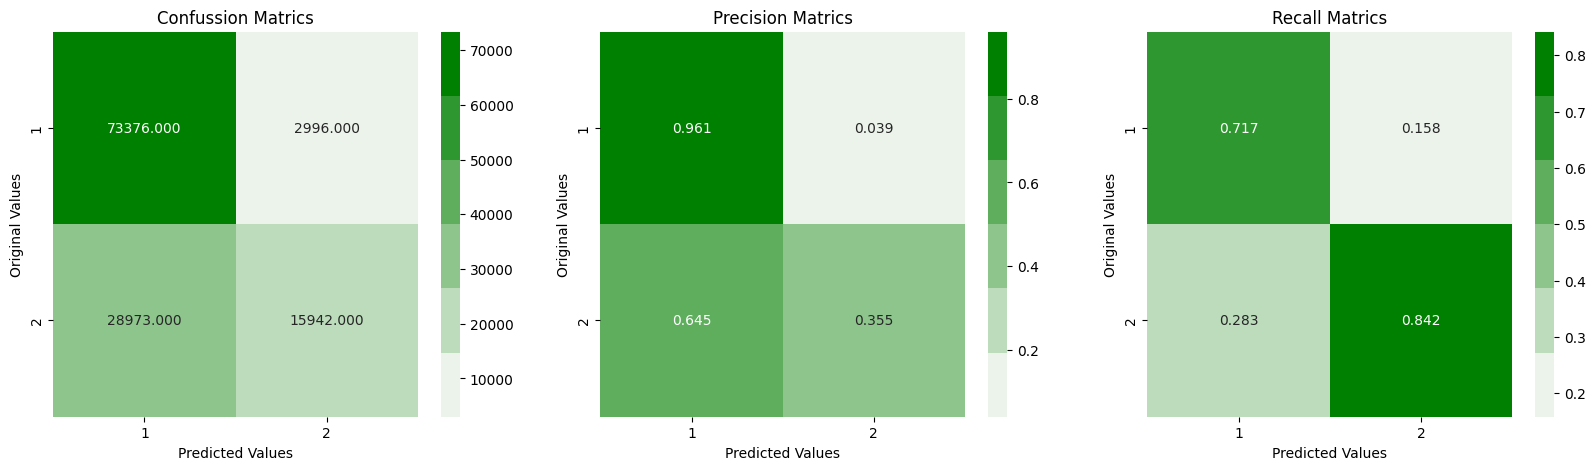

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3 , min_samples_split=8 , min_samples_leaf=4 , random_state=100)
model.fit(x_train , y_train)
predicted_y = model.predict(x_train)
print("Log loss for Train: ",log_loss(y_train , predicted_y , labels = model.classes_ , eps = 1e-10))
predicted_y = model.predict(x_test)
print("Log loss for Test: " ,log_loss(y_test , predicted_y , labels = model.classes_ , eps = 1e-10))

confussion_matrics(y_test , predicted_y)

***Observation:*** Decision Tree with gini impurity seems disaster.

<h3>1.16.7 Modelling with Decision Tree with Entropy


Train Log Loss:  0.3602772866320653
Test Log Loss:  0.3975432685679982


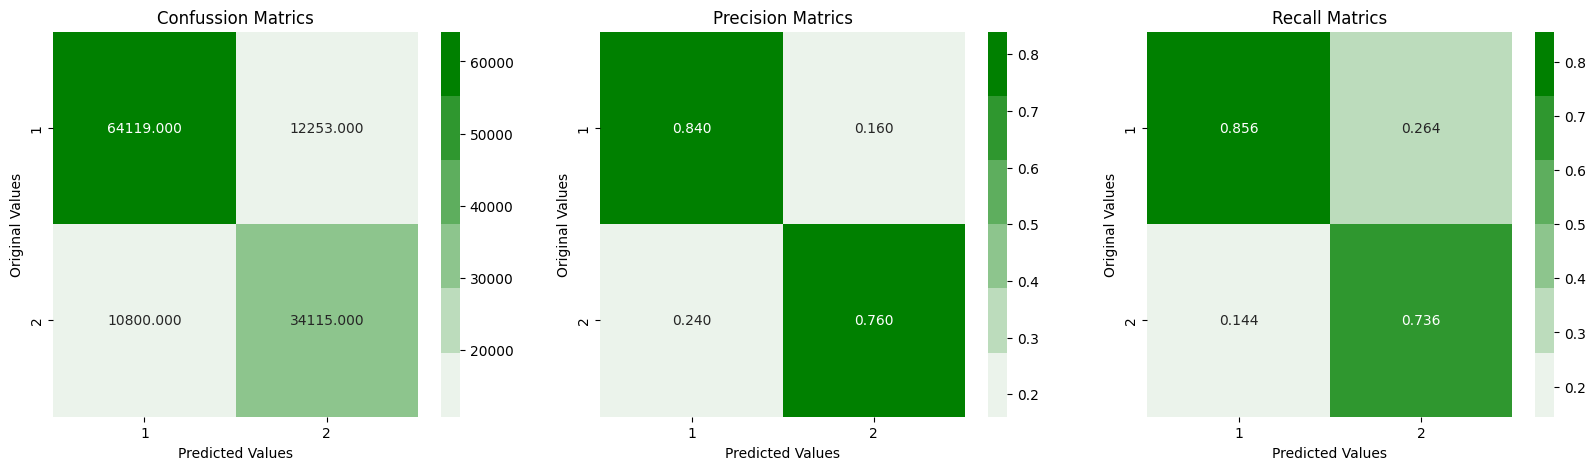

In [ ]:
from scipy.stats import randint
param_distributions = {
    'max_depth': randint(low=1, high=10),  # Random integer values between 1 and 10
    'criterion': ['gini', 'entropy'],      # Choice between 'gini' and 'entropy'
    'random_state': [100]                   # Fixed value for random_state
}

model = DecisionTreeClassifier()
rand_cv = RandomizedSearchCV(model, param_distributions=param_distributions, random_state=0)
rand_cv.fit(x_train, y_train)
predicted_y = rand_cv.predict_proba(x_train)
print("Train Log Loss: ", log_loss(y_train, predicted_y, labels=rand_cv.classes_, eps=1e-10))
predicted_y = rand_cv.predict_proba(x_test)
print("Test Log Loss: ", log_loss(y_test, predicted_y, labels=rand_cv.classes_, eps=1e-10))
confussion_matrics(y_test, np.argmax(predicted_y, axis=1))

***Observation:*** This model perform much better than decision tree with gini inpurity.